In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
import datetime as dt
import pandas as pd
from StringIO import StringIO

In [2]:
import re

def extractURLsatellite(fileURL, satName):
    """
    Function to extract the URLs for a specific satellite from the IMOS URLs list
    
    Parameters:
    -----------
    
    - fileURL : IMOS URLs list as a txt file
    - satName : name of the satellite such as JASON-2 JASON-3 
    
    Ouputs:
    ------
    
    - getFiles : list of URLs for the desired satellite
    
    """
    
    getFiles = []
    
    with open(fileURL) as f:
        for line in f:
            if re.search(r"%s"%satName, line):
                changeURL = re.sub('http://data.aodn.org.au', 'http://thredds.aodn.org.au/thredds/dodsC', line)
                getFiles.append(changeURL)
                
    return getFiles

In [3]:
jason2URL = extractURLsatellite( fileURL = 'IMOSURLs.txt', satName = 'JASON-2')

jason3URL = extractURLsatellite( fileURL = 'IMOSURLs.txt', satName = 'JASON-3')

saralURL = extractURLsatellite( fileURL = 'IMOSURLs.txt', satName = 'SARAL')

sentinel3aURL = extractURLsatellite( fileURL = 'IMOSURLs.txt', satName = 'SENTINEL-3A')

cryosat2URL = extractURLsatellite( fileURL = 'IMOSURLs.txt', satName = 'CRYOSAT-2')

In [96]:
#CBG coordinates

latmin = -25. 
latmax = -22.  
lonmin = 151.  
lonmax = 153.  

if latmin>latmax:
    print('Error wrong definition of min and max lat!!!')

if lonmin>lonmax:
    print('Error wrong definition of min and max lon!!!')


In [97]:
boxLat = []
boxLon = []
boxWh = []
boxT = []
for k in range(len(jason2URL)):
    ncs = NetCDFFile(jason2URL[k])
    lats = ncs.variables['LATITUDE'][:]
    lons = ncs.variables['LONGITUDE'][:]
    wh = ncs.variables['SWH_KU_CAL'][:]
    t = ncs.variables['TIME'][:]
    
    # Check if satellite points are in the box
    id1 = lats>latmin 
    id2 = lats<latmax
    id3 = lons>lonmin
    id4 = lons<lonmax
    id1 = id1*1
    id2 = id2*1
    id3 = id3*1
    id4 = id4*1
    tot = id1+id2+id3+id4
    # If this is the case then the sum should be 4
    inside = np.where(tot==4)[0]
    
    if len(inside)>0:
        boxLat.append(lats[inside])
        boxLon.append(lons[inside])
        boxWh.append(wh[inside])
        boxT.append(t[inside])
        

In [98]:
len(boxLat)

2

In [99]:
for k in range(len(boxLat)):
    if k == 0:
        lat = boxLat[k]
        lon = boxLon[k]
        wh = boxWh[k]
        t = boxT[k]
    else:
        lat = np.append(lat,boxLat[k])
        lon = np.append(lon,boxLon[k])
        wh = np.append(wh,boxWh[k])
        t = np.append(t,boxT[k])

In [100]:
print  min(lon)
print max(lon)

151.0
152.994


In [101]:
print min(lat)
print max(lat)

-22.9996
-22.0003


In [110]:
print min(wh)
print max(wh)


-32768.0
6.28


In [109]:
np.mean(wh>0)

masked_array(data = 0.964310609229,
             mask = False,
       fill_value = 1e+20)

TypeError: object of type 'int' has no len()

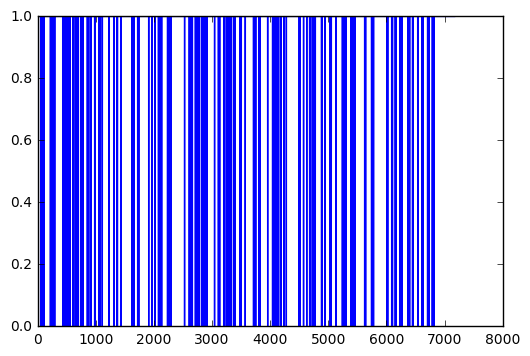

In [111]:
plt.plot(wh>0)
plt.axis(0, 7, 0, 7)
plt.show()

In [112]:
>>> np.histogram([1, 2, 1], bins=[0, 1, 2, 3])
(array([0, 2, 1]), array([0, 1, 2, 3]))
>>> np.histogram(np.arange(4), bins=np.arange(5), density=True)
(array([ 0.25,  0.25,  0.25,  0.25]), array([0, 1, 2, 3, 4]))
>>> np.histogram([[1, 2, 1], [1, 0, 1]], bins=[0,1,2,3])
(array([1, 4, 1]), array([0, 1, 2, 3]))

NameError: name 'array' is not defined

In [113]:
>>> a = np.arange(5)
>>> hist, bin_edges = np.histogram(a, density=True)
>>> hist
array([ 0.5,  0. ,  0.5,  0. ,  0. ,  0.5,  0. ,  0.5,  0. ,  0.5])
>>> hist.sum()
2.4999999999999996
>>> np.sum(hist * np.diff(bin_edges))
1.0

NameError: name 'array' is not defined

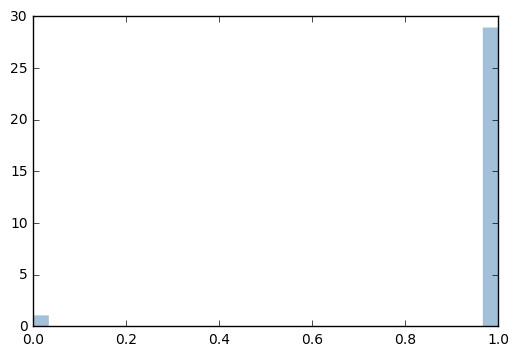

In [121]:
plt.hist(wh>0, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

In [119]:
counts, bin_edges = np.histogram(wh>0, bins=5)
print(counts)

[ 256    0    0    0 6917]


In [128]:
from numpy.random import normal
gaussian_numbers = wh(size=1000)
import matplotlib.pyplot as plt
from numpy.random import normal
gaussian_numbers = normal(size=1000)
plt.hist(gaussian_numbers, bins=20, normed=True)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

TypeError: 'MaskedArray' object is not callable